C:\Users\shris\AppData\Local\Temp\ipykernel_9408\4249302273.py:40: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_points = pd.date_range(start='2001-01-01', periods=len(aod_values_2001_2023), freq='M')


Mann-Kendall Test Result:
Mann_Kendall_Test(trend='increasing', h=True, p=0.0010956868082601101, z=3.264729444710156, Tau=0.1443252399774139, s=3834.0, var_s=1378425.3333333333, slope=0.49550000000000033, intercept=452.279)
Sen's Slope: 0.016283009466865943


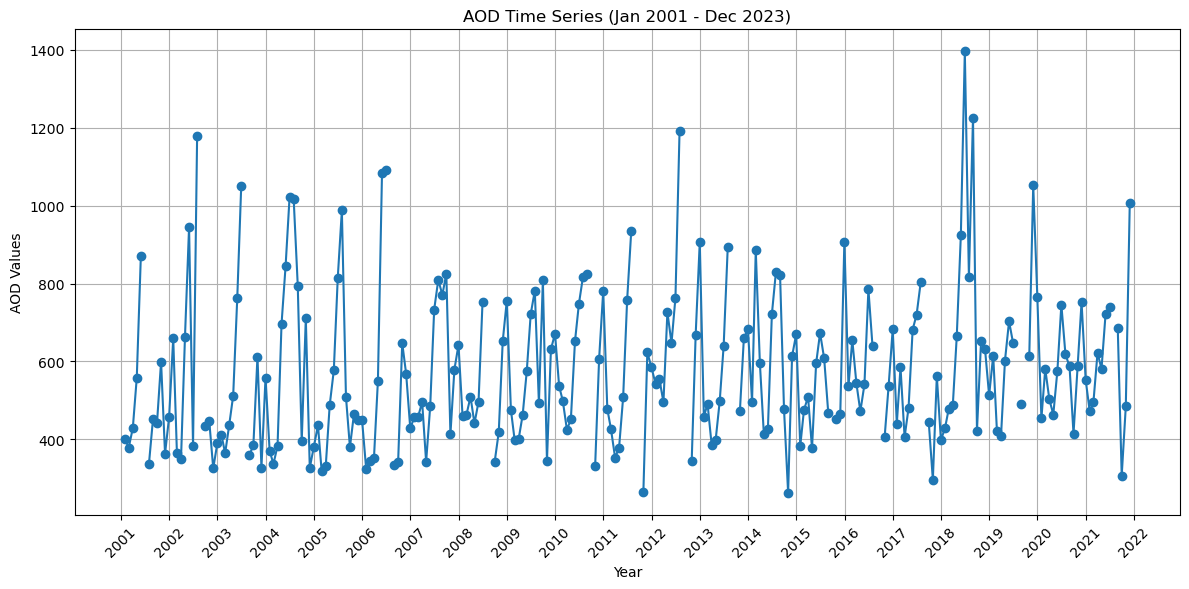

In [6]:
import numpy as np
import pandas as pd
import pymannkendall as mk
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# AOD values from Jan 2001 to Dec 2023
aod_values_2001_2023 = [
    400.8, 378.5, 428.58, 557.87, 871.75, np.nan, 336.0, 452.6, 440.6, 599.32, 362.67, 457.52,
    659.89, 365.0, 348.55, 662.5, 944.77, 383.0, 1179.0, np.nan, 435.22, 446.2, 325.19,
    389.98, 411.94, 363.78, 436.86, 511.84, 763.5, 1051.26, np.nan, 359.67,
    384.83, 612.43, 327.19, 558.29, 370.24, 336.67, 383.23,
    695.26, 845.31, 1021.82, 1017.25, 794.75, 394.56, 710.66, 326.51, 380.68,
    436.0, 317.8, 331.38, 487.95, 576.97, 815.28, 987.75, 509.09, 379.63,
    466.02, 450.14, 449.1, 323.68, 344.97, 351.53, 550.81, 1084.07, 1092.33,
    np.nan, 334.33, 340.75, 647.27, 567.13, 427.78, 457.58, 457.58, 495.37,
    341.77, 485.49, 732.92, 809.44, 771.0, 825.33, 412.75, 578.69, 642.27,
    459.31, 462.17, 509.38, 440.61, 496.67, 751.78, np.nan, np.nan,
    342.0, 418.4, 651.63, 756.16, 475.5, 398.91, 401.52, 462.43, 574.69, 721.6,
    781.64, 492.33, 808.11, 343.66, 631.02, 671.32, 536.76, 498.5,
    424.79, 450.78, 651.14, 748.0, 817.8, 825.0, np.nan, 332.33, 607.36, 780.93,
    478.02, 425.45, 352.45, 378.5, 508.23, 757.17, 933.75, np.nan, np.nan,
    264.07, 622.92, 585.43, 542.24, 555.27, 495.30, 726.49, 646.71,
    763.96, 1192.14, np.nan, np.nan, 344.44, 668.56, 906.11, 457.57, 491.07,
    385.54, 397.17, 497.41, 640.38, 894.0, np.nan, np.nan, 472.94, 660.03,
    682.26, 496.45, 885.45, 596.96, 414.31, 426.74, 721.15, 830.8, 822.33,
    477.14, 262.88, 612.88, 669.78, 382.73, 474.95, 509.18, 376.34,
    594.65, 673.19, 607.5, 467.5, np.nan, 451.51, 465.65, 907.59, 535.88,
    655.14, 543.84, 471.6, 540.86, 785.24, 639.67, np.nan, np.nan, 406.18,
    536.73, 682.55, 439.72, 585.0, 405.44, 480.2, 681.61, 720.17, 803.0, np.nan,
    443.33, 296.13, 562.39, 398.15, 428.47, 477.73, 486.92,
    664.48, 924.52, 1396.13, 818.0, 1226.0, 422.0, 651.67, 631.60, 512.73,
    614.92, 422.3, 407.65, 601.86, 703.08, 647.83, np.nan, 490.0, np.nan, 613.21,
    1052.0, 766.38, 453.64, 580.9, 502.57, 463.58, 575.89, 745.83, 618.0, 587.0,
    414.31, 587.28, 752.54, 552.94, 471.44, 496.12, 622.24,
    580.41, 722.7, 740.0, np.nan, 686.5, 306.67, 484.36, 1006.0
]

# Generate time vector (months from Jan 2001 to Dec 2023)
time_points = pd.date_range(start='2001-01-01', periods=len(aod_values_2001_2023), freq='M')

# Perform Mann-Kendall test with pymannkendall (it handles NaN values automatically)
mann_kendall_result = mk.original_test(aod_values_2001_2023)
print("Mann-Kendall Test Result:")
print(mann_kendall_result)

# Sen's slope calculation (ignoring NaN values in pairs)
def sens_slope(values, time):
    non_nan_mask = ~np.isnan(values)
    non_nan_values = np.array(values)[non_nan_mask]
    non_nan_time = time[non_nan_mask]
   
    slopes = []
    for i in range(len(non_nan_values)):
        for j in range(i + 1, len(non_nan_values)):
            slope = (non_nan_values[j] - non_nan_values[i]) / (non_nan_time[j] - non_nan_time[i]).days
            slopes.append(slope)
   
    return np.median(slopes)

# Calculate Sen's slope
slope = sens_slope(aod_values_2001_2023, time_points)
print(f"Sen's Slope: {slope}")

# Plot AOD data with NaN values
plt.figure(figsize=(12, 6))
plt.plot(time_points, aod_values_2001_2023, label='AOD values', marker='o')
plt.xlabel('Year')
plt.ylabel('AOD Values')
plt.title('AOD Time Series (Jan 2001 - Dec 2023)')
plt.grid(True)

# Format x-axis labels to show only years, including 2023
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # Show every year
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()